# Preprocessing 

In [4]:
import pandas as pd

In [47]:
df = pd.read_excel('Défaillance client.xlsx', sheet_name='Impayés')
df2 = pd.read_excel('Défaillance client.xlsx', sheet_name='Sinistres')
df3 = pd.read_excel('Défaillance client.xlsx', sheet_name='CA annuel 2023')
df4 = pd.read_excel('Défaillance client.xlsx', sheet_name='CA annuel 2022')
df5 = pd.read_excel('Défaillance client.xlsx', sheet_name='Encaissement annuel 2023')
df6 = pd.read_excel('Défaillance client.xlsx', sheet_name='Encaissement annuel 2022')

### Nettoyage des tables Chiffres d'affaires et encaissements

In [48]:
df3 = df3.rename(columns={"   Chiffre d'affaires": "CA 23"})
df4 = df4.rename(columns={"   Chiffre d'affaires": "CA 22"})
df5 = df5.rename(columns={'       Mtant en DI': 'Mtant 23'})
df6 = df6.rename(columns={'       Mtant en DI': 'Mtant 22'})

j'ai combiné le CA de 22 avec l'encaissement de 22 avec la variable Client 'c'est ceci ou ce situe la relation'

In [50]:
df_3_5 = pd.merge(df3, df5, on=['Client'], how='outer')
df_3_5 = df_3_5.dropna(subset=['CA 23'])
df_3_5 = df_3_5.dropna(subset=['Client'])
df_3_5 = df_3_5.drop(columns=['P.','Cde postal','Dev.','Dev.I','Rue','Sté'])
df_3_5 = df_3_5.rename(columns={'Client': 'Code', 'Nom 1': 'Client'}, inplace=True)



In [54]:
df_CA23 = df_3_5
df_CA23

,Code,Client,Ville,CA 23,Mtant 23
0,1707.0,VENTES AU PERSONNEL SE SAFI,NaN,314788.80,-314788.80
1,1046246.0,STE SMH TELECOMMUNICATION,CASABLANCA,383076.00,-595764.00
2,1046254.0,STE SOCIMAT,CASABLANCA,6373851.00,-7296849.00
3,1046271.0,TAMCO,OULED TEIMA,14452172.28,-15447995.98
4,1046281.0,ETS AIT OUCHEN FRERES,TAROUDANT,1454776.20,-1497054.00
...,...,...,...,...,...
1044,1249067.0,Mr EL BASLAMI ABDELLAH,SALE,56520.00,-83065.00
1045,1249068.0,Mr ZOUHRI MBAREK,SALE,50736.00,-113972.00
1046,1249069.0,Mr HACHAM LAHCEN,AGADIR,3888.00,-5597.00
1047,1249079.0,STE ARMAN BUILDING,CASABLANCA,30912.00,-45402.00


In [80]:
df_4_6 = pd.merge(df4, df6, on=['Client'], how='outer')
df_4_6 = df_4_6.drop(columns=['P.','Cde postal','Dev.','Dev.I','Rue','Sté'])
df_4_6 = df_4_6.dropna(subset=['CA 22'])
df_4_6 = df_4_6.dropna(subset=['Client'])



In [81]:
df_CA22 = df_4_6

df_CA22 

,Cpt. coll.,Client,Nom 1,Ville,CA 22,Mtant 22
0,1.222100e+09,1705.0,VENTES AU PERSONNEL D'AGADIR,AGADIR,57600.00,-57600.00
1,1.222100e+09,1707.0,VENTES AU PERSONNEL SE SAFI,NaN,260884.80,-260884.80
2,1.222100e+09,1046246.0,STE SMH TELECOMMUNICATION,CASABLANCA,296976.00,-81120.00
3,1.222100e+09,1046254.0,STE SOCIMAT,CASABLANCA,8809506.00,-6858120.00
4,1.222100e+09,1046271.0,TAMCO,OULED TEIMA,16717058.26,-16725403.12
...,...,...,...,...,...,...
1225,1.222100e+09,1248493.0,STE FITNESS TRAVAUX,CASABLANCA,100224.00,-108000.00
1226,1.222100e+09,1248494.0,STE SOBECOM,RABAT,45792.00,NaN
1227,1.222100e+09,1248496.0,STE WORCO,TANGER,901320.00,NaN
1228,1.222100e+09,1248499.0,Mr BENDI OUAFA,CASABLANCA,80640.00,-91800.00


In [82]:
nombre_nulles_par_colonne = df_3_5.isnull().sum()
nombre_lignes_non_nulles = df_3_5['CA 23'].notnull().sum()

print(nombre_lignes_non_nulles)
print("*****************nul")
print(nombre_nulles_par_colonne)

1049
*****************nul
Code         0
Client       0
Ville        1
CA 23        0
Mtant 23    38
dtype: int64


Pareil ici c'est la meme chose

In [83]:
df_CA22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 0 to 1229
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cpt. coll.  1230 non-null   float64
 1   Client      1230 non-null   float64
 2   Nom 1       1230 non-null   object 
 3   Ville       1229 non-null   object 
 4   CA 22       1230 non-null   float64
 5   Mtant 22    1152 non-null   float64
dtypes: float64(4), object(2)
memory usage: 67.3+ KB


### Pour finir le plus important jusqu'a la c'est la liaison entre (Chiffre d'afffaire 2023 et encaissement 2023) df3_5 et (Chiffre d'afffaire 2022 et encaissement 2022) df4_6

In [84]:
df_CA22

,Cpt. coll.,Client,Nom 1,Ville,CA 22,Mtant 22
0,1.222100e+09,1705.0,VENTES AU PERSONNEL D'AGADIR,AGADIR,57600.00,-57600.00
1,1.222100e+09,1707.0,VENTES AU PERSONNEL SE SAFI,NaN,260884.80,-260884.80
2,1.222100e+09,1046246.0,STE SMH TELECOMMUNICATION,CASABLANCA,296976.00,-81120.00
3,1.222100e+09,1046254.0,STE SOCIMAT,CASABLANCA,8809506.00,-6858120.00
4,1.222100e+09,1046271.0,TAMCO,OULED TEIMA,16717058.26,-16725403.12
...,...,...,...,...,...,...
1225,1.222100e+09,1248493.0,STE FITNESS TRAVAUX,CASABLANCA,100224.00,-108000.00
1226,1.222100e+09,1248494.0,STE SOBECOM,RABAT,45792.00,NaN
1227,1.222100e+09,1248496.0,STE WORCO,TANGER,901320.00,NaN
1228,1.222100e+09,1248499.0,Mr BENDI OUAFA,CASABLANCA,80640.00,-91800.00


In [85]:
# Trouver l'indice de la plus grande valeur dans la colonne 'CA 23'
indice_max = df_CA23['CA 23'].idxmax()

# Trouver le client correspondant à la plus grande valeur dans la colonne 'CA 23'
client_max = df_CA23.loc[indice_max, 'Client']

valeur_max = df_CA23.loc[indice_max, 'CA 23']
print(f"Client avec la plus grande valeur de CA 23: {client_max}, Valeur: {valeur_max}")

# Trouver l'indice de la plus petite valeur dans la colonne 'CA 23'
indice_min = df_CA23['CA 23'].idxmin()

# Trouver le client correspondant à la plus petite valeur dans la colonne 'CA 23'
client_min = df_3_5.loc[indice_min, 'Client']
valeur_min = df_3_5.loc[indice_min, 'CA 23']
print(f"Client avec la plus petite valeur de CA 23: {client_min}, Valeur: {valeur_min}")

Client avec la plus grande valeur de CA 23: SOSAMAC SARL, Valeur: 304285829.98
Client avec la plus petite valeur de CA 23: STE EAMAR DE GENIE CIVILE, Valeur: -242253.0


### Nettoyage de la table impayée 

In [86]:
df_impaye = pd.read_excel('Défaillance client.xlsx', sheet_name='Impayés')
df_impaye

,Date,Code,Client,Représentant,Montant,Nature,Echéance,Ville,Motif Imp,Date limite déc,Observations,Statut,Activité
0,2022-01-03,1212216,STE DAOUDI ISSAM,EL HEINDI MOHAMED,26286.00,CH 717604,2021-12-30,Sale,Absence ou insuffisance de provision,2022-02-13,Représenté le 01/02/2022,Réglé,BPE
1,2022-01-03,1236887,STE WIDAS SERVICES,BOUKHAR hamid,95425.58,CH 1777588,2021-12-30,Agadir,SAISIE ARRET,2022-02-13,DIC,Non réglé,BPE
2,2022-01-12,1244614,STE SALTT,BOUKHAR hamid,199068.00,CH 5940584,2022-01-10,Agadir,Absence ou insuffisance de provision,2022-02-24,Remplacé par chèque 693687 le 26/04/2022,Réglé,BPE
3,2022-01-12,1239954,STE FM-NEGOCE,ALAOUI MDAGHRI OMAR,31032.00,Effet 6301746,2022-01-06,Casablanca,Absence ou insuffisance de provision,2022-02-20,DIC,Non réglé,BPE
4,2022-01-13,1047513,STE BINMA,SELLOUTI MED AMINE,66669.65,Effet 7254971,2022-01-12,Casablanca,Absence ou insuffisance de provision,2022-02-26,HG,Non réglé,Granulats
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,2023-09-25,1248556,R.K.R 3,OUCHTOU,37600.00,CH 6890017,2023-09-21,Bengrir,IMAGE CHEQUE ILLISIBLE,2023-11-05,Representé le 26/09/2023,Réglé,Ciments
1033,2023-09-25,1248556,R.K.R 3,OUCHTOU,37500.00,CH 7303991,2023-09-21,Bengrir,IMAGE CHEQUE ILLISIBLE,2023-11-05,Representé le 26/09/2023,Réglé,Ciments
1034,2023-09-25,1248556,R.K.R 3,OUCHTOU,37600.00,CH 6890051,2023-09-21,Bengrir,IMAGE CHEQUE ILLISIBLE,2023-11-05,Representé le 26/09/2023,Réglé,Ciments
1035,2023-10-05,1046414,S.I.3,OUCHTOU,200000.00,Effet 3100047,2023-10-03,Marrakech,Absence ou insuffisance de provision,2023-11-17,NaN,Non réglé,Ciments


In [87]:
df_impaye = df_impaye.drop(['Date','Représentant','Nature','Echéance','Date limite déc','Observations','Statut'], axis= 1)
df_impaye = df_impaye.rename(columns={'Motif Imp': 'Motif'})
df_impaye

,Code,Client,Montant,Ville,Motif,Activité
0,1212216,STE DAOUDI ISSAM,26286.00,Sale,Absence ou insuffisance de provision,BPE
1,1236887,STE WIDAS SERVICES,95425.58,Agadir,SAISIE ARRET,BPE
2,1244614,STE SALTT,199068.00,Agadir,Absence ou insuffisance de provision,BPE
3,1239954,STE FM-NEGOCE,31032.00,Casablanca,Absence ou insuffisance de provision,BPE
4,1047513,STE BINMA,66669.65,Casablanca,Absence ou insuffisance de provision,Granulats
...,...,...,...,...,...,...
1032,1248556,R.K.R 3,37600.00,Bengrir,IMAGE CHEQUE ILLISIBLE,Ciments
1033,1248556,R.K.R 3,37500.00,Bengrir,IMAGE CHEQUE ILLISIBLE,Ciments
1034,1248556,R.K.R 3,37600.00,Bengrir,IMAGE CHEQUE ILLISIBLE,Ciments
1035,1046414,S.I.3,200000.00,Marrakech,Absence ou insuffisance de provision,Ciments


In [88]:
valeurs_uniques = df_impaye['Motif'].unique()
print(valeurs_uniques)

frequence_valeurs = df_impaye['Motif'].value_counts()
print(frequence_valeurs)

['Absence ou insuffisance de provision' 'SAISIE ARRET'
 'VICE DE FORME-MANQUE MENTION DHS'
 'VICE DE FORME - RATURES ET SURCHARGES'
 'VICE DE FORME - RATURE ET SURCHARGES NON APPROUVES PAR LE TIRE'
 'ABSENCE DU LIEU DE CREATION   ' 'RATURES ET SURCHARGES         '
 'ABSENCE LIEU DE CREATION'
 'VICE DE FORME - MONTANT EN CHIFFRE DIFF DU MONTANT EN LETTRE'
 'ABSENCE DATE EMISSION CHEQUE  ' 'SIGNATURE INCORRECTE'
 'VICE DEFORME - RATURES ET SURCHARGES' 'CHEQUE EN DEVISE NON COTEE    '
 'OPPOSITION SUR COMPTE         ' 'SIGNATURE INCORRECTE          '
 'NON CONFORMITE MONTANT ECHANGE' 'SIGNATURE N/CONFORME DU TIREUR'
 'ENDOS IRREGULIER' 'RATURES ET SURCHARGES'
 'ABSENCE SIGNATURE EMETTEUR    '
 'CHEQUE EN DEVISE NON COTEE\xa0\xa0\xa0 '
 'SIGNATURE INCORRECTE\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 '
 'DEJA REGLE\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0 '
 'VICE DE FORME - RATURES ET SURCHARGES ON APPROUVE PAR LE TIRE'
 'COMPTE FERME\xa0\xa0\xa0\xa0\xa0\xa0\xa

In [89]:
frequence_valeurs = df_impaye['Motif'].value_counts()
frequence_valeurs

Motif
Absence ou insuffisance de provision                                 786
SAISIE ARRET                                                          34
NON CONFORMITE MONTANT ECHANGE                                        22
ENDOSSEMENT IRREGULIER                                                15
SIGNATURE INCORRECTE                                                  14
                                                                    ... 
CHQ FRAPPE D'OPPOS PR FALSIFIC                                         1
VICE DE FORME - DIFFERENCE MONTANT EN CHIFFRE ET CELUI EN LETTRE       1
Solde du compte indisponible                                           1
VICE DE FORME                                                          1
DIFF MONTANT EN CHIFFRE ET CELUI EN LETTRE                             1
Name: count, Length: 72, dtype: int64

In [90]:
# Liste des valeurs à remplacer par 1
valeurs_a_remplacer = [
    'COMPTE FERME', 
    'OPPOSITION SUR COMPTE', 
    'Absence ou insuffisance de provision', 
    'SAISIE ARRET'
]

# Remplacer les valeurs dans la colonne 'status'
df_impaye['Motif'] = df_impaye['Motif'].apply(lambda x: 1 if x in valeurs_a_remplacer else 0)

print("\nDataFrame après remplacement des valeurs :")
print(df_impaye)



DataFrame après remplacement des valeurs :
         Code              Client    Montant       Ville  Motif   Activité
0     1212216    STE DAOUDI ISSAM   26286.00        Sale      1        BPE
1     1236887  STE WIDAS SERVICES   95425.58      Agadir      1        BPE
2     1244614           STE SALTT  199068.00      Agadir      1        BPE
3     1239954       STE FM-NEGOCE   31032.00  Casablanca      1        BPE
4     1047513           STE BINMA   66669.65  Casablanca      1  Granulats
...       ...                 ...        ...         ...    ...        ...
1032  1248556             R.K.R 3   37600.00     Bengrir      0    Ciments
1033  1248556             R.K.R 3   37500.00     Bengrir      0    Ciments
1034  1248556             R.K.R 3   37600.00     Bengrir      0    Ciments
1035  1046414               S.I.3  200000.00   Marrakech      1    Ciments
1036  1248648             BETAGLO   43820.00  AL hoceima      1    Ciments

[1037 rows x 6 columns]


In [91]:
counts = df_impaye['Motif'].value_counts()
print("\nNombre de 0 et de 1 dans la colonne 'Motif' :")
print(counts)


Nombre de 0 et de 1 dans la colonne 'Motif' :
Motif
1    789
0    248
Name: count, dtype: int64


In [92]:
# Grouper par 'Code' et agréger les autres colonnes
df_grouped = df_impaye.groupby('Code').agg({
    'Client': 'first',
    'Ville': 'first',
    'Motif': 'first',
    'Activité': 'first'
}).reset_index()

# Calculer le nombre d'occurrences de chaque client
client_counts = df_impaye['Client'].value_counts().reset_index()
client_counts.columns = ['Client', 'Nombre_de_redundances']

# Joindre ces informations au DataFrame regroupé
df_grouped = df_grouped.merge(client_counts, on='Client', how='left')

# Ajuster la colonne 'Montant' avec la somme conditionnelle
def calculer_montant(code, motif):
    df_client = df_impaye[df_impaye['Code'] == code]
    if motif == 1:
        return df_client[df_client['Motif'] == 1]['Montant'].sum()
    else:
        return df_client[df_client['Motif'] == 0]['Montant'].max()

df_grouped['Montant'] = df_grouped.apply(lambda row: calculer_montant(row['Code'], row['Motif']), axis=1)

print("\nDataFrame après fusion, agrégation et ajout de la colonne de comptage :")
df_grouped


DataFrame après fusion, agrégation et ajout de la colonne de comptage :


,Code,Client,Ville,Motif,Activité,Nombre_de_redundances,Montant
0,1046345,BINMA,Casablanca,1,Ciments,22,1300000.00
1,1046358,SO.SA.CIM,Tan tan,0,Ciments,1,250000.00
2,1046363,SOMACOTE S.A.,Marrakech,1,Ciments,19,3548989.44
3,1046414,S.I.3,Marrakech,1,Ciments,62,13781523.97
4,1046417,STE RICHE BOIS (B),Casablanca,0,BPE,1,54528.00
...,...,...,...,...,...,...,...
318,1248648,BETAGLO,AL hoceima,1,Ciments,1,43820.00
319,1248682,BRICO OUALKADI,Nador,0,Ciments,1,17712.00
320,1248741,TIZAL CONSTRUCTION,Agadir,0,Ciments,1,40532.40
321,1248843,Mr LACHRAF ABDESSAMAD,Casablanca,0,BPE,1,33600.00


In [93]:
# Nom du client spécifique
client_specifique = 'MATERCA SARL'

# Filtrer les lignes correspondant au client spécifique et calculer la somme des montants
somme_montant = df_grouped.loc[df_grouped['Client'] == client_specifique, 'Montant']
somme_montant

7    114283.2
Name: Montant, dtype: float64

In [94]:

df_impaye = df_grouped.drop('Motif', axis= 1)
df_impaye = df_impaye.drop('Ville', axis= 1)
df_impaye

,Code,Client,Activité,Nombre_de_redundances,Montant
0,1046345,BINMA,Ciments,22,1300000.00
1,1046358,SO.SA.CIM,Ciments,1,250000.00
2,1046363,SOMACOTE S.A.,Ciments,19,3548989.44
3,1046414,S.I.3,Ciments,62,13781523.97
4,1046417,STE RICHE BOIS (B),BPE,1,54528.00
...,...,...,...,...,...
318,1248648,BETAGLO,Ciments,1,43820.00
319,1248682,BRICO OUALKADI,Ciments,1,17712.00
320,1248741,TIZAL CONSTRUCTION,Ciments,1,40532.40
321,1248843,Mr LACHRAF ABDESSAMAD,BPE,1,33600.00


### Table chiffre d'affaire et encaissement

In [95]:
df_CA = df_CA23

In [96]:
df_CA

,Code,Client,Ville,CA 23,Mtant 23
0,1707.0,VENTES AU PERSONNEL SE SAFI,NaN,314788.80,-314788.80
1,1046246.0,STE SMH TELECOMMUNICATION,CASABLANCA,383076.00,-595764.00
2,1046254.0,STE SOCIMAT,CASABLANCA,6373851.00,-7296849.00
3,1046271.0,TAMCO,OULED TEIMA,14452172.28,-15447995.98
4,1046281.0,ETS AIT OUCHEN FRERES,TAROUDANT,1454776.20,-1497054.00
...,...,...,...,...,...
1044,1249067.0,Mr EL BASLAMI ABDELLAH,SALE,56520.00,-83065.00
1045,1249068.0,Mr ZOUHRI MBAREK,SALE,50736.00,-113972.00
1046,1249069.0,Mr HACHAM LAHCEN,AGADIR,3888.00,-5597.00
1047,1249079.0,STE ARMAN BUILDING,CASABLANCA,30912.00,-45402.00


In [97]:
df_test = pd.merge(df_impaye, df_CA, on=['Code','Client'], how='outer')
df_test

,Code,Client,Activité,Nombre_de_redundances,Montant,Ville,CA 23,Mtant 23
0,1046345.0,BINMA,Ciments,22.0,1300000.00,NaN,NaN,NaN
1,1046358.0,SO.SA.CIM,Ciments,1.0,250000.00,TAN TAN,62312702.40,-65366794.84
2,1046363.0,SOMACOTE S.A.,Ciments,19.0,3548989.44,MARRAKECH,22565390.33,-26360672.82
3,1046414.0,S.I.3,Ciments,62.0,13781523.97,MARRAKECH,46146782.57,-56197371.69
4,1046417.0,STE RICHE BOIS (B),BPE,1.0,54528.00,CASABLANCA,4522506.00,-2666571.00
...,...,...,...,...,...,...,...,...
1199,1249067.0,Mr EL BASLAMI ABDELLAH,NaN,NaN,NaN,SALE,56520.00,-83065.00
1200,1249068.0,Mr ZOUHRI MBAREK,NaN,NaN,NaN,SALE,50736.00,-113972.00
1201,1249069.0,Mr HACHAM LAHCEN,NaN,NaN,NaN,AGADIR,3888.00,-5597.00
1202,1249079.0,STE ARMAN BUILDING,NaN,NaN,NaN,CASABLANCA,30912.00,-45402.00


In [99]:
df_test = df_test.drop(['Activité', 'Ville'], axis=1)


In [101]:
df_test.isnull().sum()

Code                       0
Client                     0
Nombre_de_redundances    881
Montant                  881
CA 23                    155
Mtant 23                 193
dtype: int64

In [102]:
df_test = df_test.fillna(0)
df_test

,Code,Client,Nombre_de_redundances,Montant,CA 23,Mtant 23
0,1046345.0,BINMA,22.0,1300000.00,0.00,0.00
1,1046358.0,SO.SA.CIM,1.0,250000.00,62312702.40,-65366794.84
2,1046363.0,SOMACOTE S.A.,19.0,3548989.44,22565390.33,-26360672.82
3,1046414.0,S.I.3,62.0,13781523.97,46146782.57,-56197371.69
4,1046417.0,STE RICHE BOIS (B),1.0,54528.00,4522506.00,-2666571.00
...,...,...,...,...,...,...
1199,1249067.0,Mr EL BASLAMI ABDELLAH,0.0,0.00,56520.00,-83065.00
1200,1249068.0,Mr ZOUHRI MBAREK,0.0,0.00,50736.00,-113972.00
1201,1249069.0,Mr HACHAM LAHCEN,0.0,0.00,3888.00,-5597.00
1202,1249079.0,STE ARMAN BUILDING,0.0,0.00,30912.00,-45402.00


### Fusionnement de toutes les tables

In [103]:
df_test['score'] = 4*df_test['CA 23']+2*df_test['Mtant 23']-2*(df_test['Nombre_de_redundances']*df_test['Montant'])
df_test

,Code,Client,Nombre_de_redundances,Montant,CA 23,Mtant 23,score
0,1046345.0,BINMA,22.0,1300000.00,0.00,0.00,-5.720000e+07
1,1046358.0,SO.SA.CIM,1.0,250000.00,62312702.40,-65366794.84,1.180172e+08
2,1046363.0,SOMACOTE S.A.,19.0,3548989.44,22565390.33,-26360672.82,-9.732138e+07
3,1046414.0,S.I.3,62.0,13781523.97,46146782.57,-56197371.69,-1.636717e+09
4,1046417.0,STE RICHE BOIS (B),1.0,54528.00,4522506.00,-2666571.00,1.264783e+07
...,...,...,...,...,...,...,...
1199,1249067.0,Mr EL BASLAMI ABDELLAH,0.0,0.00,56520.00,-83065.00,5.995000e+04
1200,1249068.0,Mr ZOUHRI MBAREK,0.0,0.00,50736.00,-113972.00,-2.500000e+04
1201,1249069.0,Mr HACHAM LAHCEN,0.0,0.00,3888.00,-5597.00,4.358000e+03
1202,1249079.0,STE ARMAN BUILDING,0.0,0.00,30912.00,-45402.00,3.284400e+04


In [104]:
from sklearn.preprocessing import StandardScaler


# Normalisation des scores
scaler = StandardScaler()
df_test['Score_scaled'] = scaler.fit_transform(df_test[['score']])
df_test

,Code,Client,Nombre_de_redundances,Montant,CA 23,Mtant 23,score,Score_scaled
0,1046345.0,BINMA,22.0,1300000.00,0.00,0.00,-5.720000e+07,-1.054297
1,1046358.0,SO.SA.CIM,1.0,250000.00,62312702.40,-65366794.84,1.180172e+08,2.064898
2,1046363.0,SOMACOTE S.A.,19.0,3548989.44,22565390.33,-26360672.82,-9.732138e+07,-1.768533
3,1046414.0,S.I.3,62.0,13781523.97,46146782.57,-56197371.69,-1.636717e+09,-29.172650
4,1046417.0,STE RICHE BOIS (B),1.0,54528.00,4522506.00,-2666571.00,1.264783e+07,0.189125
...,...,...,...,...,...,...,...,...
1199,1249067.0,Mr EL BASLAMI ABDELLAH,0.0,0.00,56520.00,-83065.00,5.995000e+04,-0.034963
1200,1249068.0,Mr ZOUHRI MBAREK,0.0,0.00,50736.00,-113972.00,-2.500000e+04,-0.036475
1201,1249069.0,Mr HACHAM LAHCEN,0.0,0.00,3888.00,-5597.00,4.358000e+03,-0.035952
1202,1249079.0,STE ARMAN BUILDING,0.0,0.00,30912.00,-45402.00,3.284400e+04,-0.035445


In [105]:
def classify_score(score):
    if score > 1:
        return 1
    elif 0<= score <= 1:
        return 2
    elif -0.035 <= score < 0:
        return 3
    elif -0.07 <= score < -0.035:
        return 4
    else:
        return 5
 

df_test['Cluster_label'] = df_test['Score_scaled'].apply(classify_score)

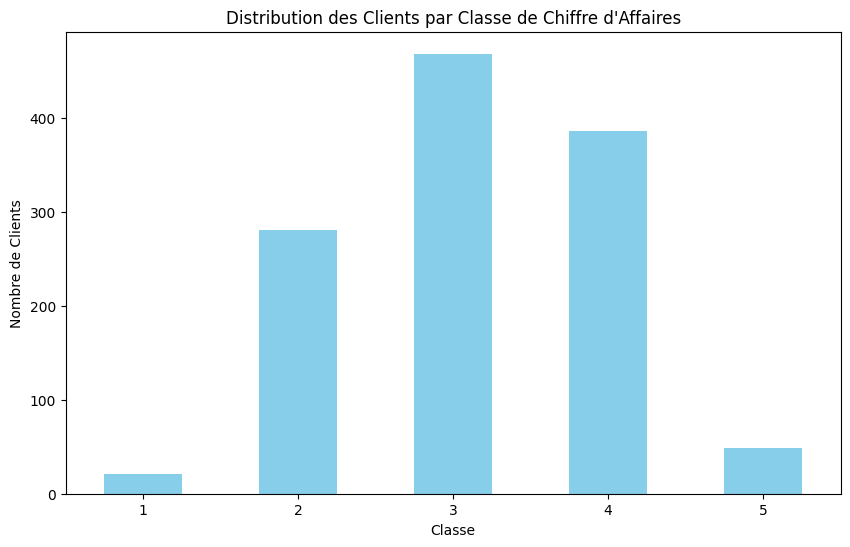

In [107]:
import matplotlib.pyplot as plt


# Compter le nombre de clients dans chaque classe
classe_counts = df_test['Cluster_label'].value_counts().sort_index()

# Créer un bar plot
plt.figure(figsize=(10, 6))
classe_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution des Clients par Classe de Chiffre d\'Affaires')
plt.xlabel('Classe')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=0)
plt.show()

In [108]:
count = df_test['Cluster_label'].value_counts()
count

Cluster_label
3    468
4    386
2    280
5     49
1     21
Name: count, dtype: int64

In [109]:
df_test

,Code,Client,Nombre_de_redundances,Montant,CA 23,Mtant 23,score,Score_scaled,Cluster_label
0,1046345.0,BINMA,22.0,1300000.00,0.00,0.00,-5.720000e+07,-1.054297,5
1,1046358.0,SO.SA.CIM,1.0,250000.00,62312702.40,-65366794.84,1.180172e+08,2.064898,1
2,1046363.0,SOMACOTE S.A.,19.0,3548989.44,22565390.33,-26360672.82,-9.732138e+07,-1.768533,5
3,1046414.0,S.I.3,62.0,13781523.97,46146782.57,-56197371.69,-1.636717e+09,-29.172650,5
4,1046417.0,STE RICHE BOIS (B),1.0,54528.00,4522506.00,-2666571.00,1.264783e+07,0.189125,2
...,...,...,...,...,...,...,...,...,...
1199,1249067.0,Mr EL BASLAMI ABDELLAH,0.0,0.00,56520.00,-83065.00,5.995000e+04,-0.034963,3
1200,1249068.0,Mr ZOUHRI MBAREK,0.0,0.00,50736.00,-113972.00,-2.500000e+04,-0.036475,4
1201,1249069.0,Mr HACHAM LAHCEN,0.0,0.00,3888.00,-5597.00,4.358000e+03,-0.035952,4
1202,1249079.0,STE ARMAN BUILDING,0.0,0.00,30912.00,-45402.00,3.284400e+04,-0.035445,4


In [110]:
# Fonction pour déterminer le cluster
def determine_cluster(score):
    if score > 1:
        return 1
    elif 0 <= score <= 1:
        return 2
    elif -0.035 <= score < 0:
        return 3
    elif -0.07 <= score < -0.035:
        return 4
    else:
        return 5

### Random Forest

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# Séparer les features et la cible
X = df_test[['Nombre_de_redundances', 'Montant', 'CA 23', 'Mtant 23']]
y = df_test['Score_scaled']
y_true_clusters = df_test['Cluster_label']

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données
X_train, X_test, y_train, y_test, y_true_clusters_train, y_true_clusters_test = train_test_split(
    X_scaled, y, y_true_clusters, test_size=0.2, random_state=42)

# Entraîner le modèle de forêt aléatoire
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_pred_clusters = [determine_cluster(score) for score in y_pred]

# Calcul des métriques
accuracy = accuracy_score(y_true_clusters_test, y_pred_clusters)

# Affichage des résultats
print(f"Accuracy: {accuracy:.2f}")


# Rapport de classification
report = classification_report(y_true_clusters_test, y_pred_clusters)
print("Classification Report:")
print(report)


#save models
import joblib

# Save the Random Forest Classifier
joblib.dump(model , 'random_forest_classifier.pkl')


print("Models saved successfully!")



Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.97      0.93      0.95        61
           3       0.93      0.95      0.94        86
           4       0.95      0.97      0.96        76
           5       0.86      0.67      0.75         9

    accuracy                           0.95       241
   macro avg       0.94      0.91      0.92       241
weighted avg       0.95      0.95      0.95       241

Models saved successfully!


 ### KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Standardiser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Sauvegarder le scaler
joblib.dump(scaler, 'scaler.pkl')

# Diviser les données
X_train, X_test, y_train, y_test, y_true_clusters_train, y_true_clusters_test = train_test_split(
    X_scaled, y, y_true_clusters, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_pred_clusters_knn = [determine_cluster(score) for score in y_pred_knn]

# Calcul des métriques
accuracy_knn = accuracy_score(y_true_clusters_test, y_pred_clusters_knn)

print(f"Accuracy k-NN: {accuracy_knn:.2f}")

# Rapport de classification
report = classification_report(y_true_clusters_test, y_pred_clusters_knn)
print("Classification Report:")
print(report)

# Save 
joblib.dump(knn_model , 'KNN.pkl')


print("Model saved successfully!")


Accuracy k-NN: 0.93
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.95      0.93      0.94        61
           3       0.92      0.91      0.91        86
           4       0.93      0.97      0.95        76
           5       0.86      0.67      0.75         9

    accuracy                           0.93       241
   macro avg       0.93      0.90      0.91       241
weighted avg       0.93      0.93      0.93       241

Model saved successfully!


### Logistic Regression

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Variables Indépendantes et Dépendantes
X = df_test[['Nombre_de_redundances', 'Montant', 'CA 23', 'Mtant 23']]
y = df_test['Cluster_label']

# Division des Données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du Modèle
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
clf.fit(X_train_scaled, y_train)

# Évaluation
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.6740331491712708
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.93      0.65      0.77        84
           3       0.57      0.90      0.69       138
           4       0.74      0.44      0.55       117
           5       0.83      0.38      0.53        13

    accuracy                           0.67       362
   macro avg       0.81      0.65      0.70       362
weighted avg       0.73      0.67      0.67       362



c:\Users\amine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [115]:
import numpy as np

from sklearn.impute import SimpleImputer

df = df_test

# Feature Engineering
df['ratio_CA_Mtant'] = df['CA 23'] / (df['Mtant 23'] + 1e-9)
df['abs_diff_CA_Mtant'] = abs(df['CA 23'] - df['Mtant 23'])
df['log_CA'] = np.log1p(df['CA 23'])
df['log_Mtant'] = np.log1p(df['Mtant 23'])
df['interaction_CA_Mtant'] = df['CA 23'] * df['Mtant 23']
df['redundance_CA'] = df['Nombre_de_redundances'] * df['CA 23']
df['redundance_Mtant'] = df['Nombre_de_redundances'] * df['Mtant 23']

# Variables Indépendantes et Dépendantes
X = df[['Nombre_de_redundances', 'Montant', 'CA 23', 'Mtant 23', 'ratio_CA_Mtant', 'abs_diff_CA_Mtant', 'log_CA', 'log_Mtant', 'interaction_CA_Mtant', 'redundance_CA', 'redundance_Mtant']]
y = df['Cluster_label']

# Division des Données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Imputation des Valeurs Manquantes
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Entraînement du Modèle
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
clf.fit(X_train_scaled, y_train)

# Évaluation
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8480662983425414
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.92      0.86      0.89        84
           3       0.78      0.90      0.84       138
           4       0.90      0.81      0.85       117
           5       0.86      0.46      0.60        13

    accuracy                           0.85       362
   macro avg       0.86      0.81      0.82       362
weighted avg       0.85      0.85      0.85       362



c:\Users\amine\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\amine\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\amine\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.92      0.86      0.89        84
           3       0.78      0.90      0.84       138
           4       0.90      0.81      0.85       117
           5       0.86      0.46      0.60        13

    accuracy                           0.85       362
   macro avg       0.86      0.81      0.82       362
weighted avg       0.85      0.85      0.85       362



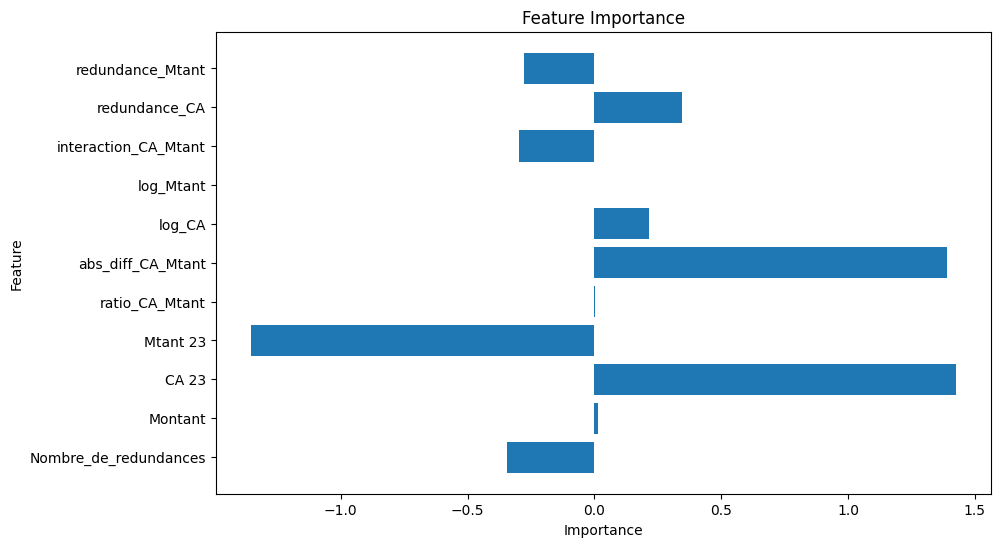

In [335]:
# Importance des fonctionnalités
import matplotlib.pyplot as plt
importance = clf.coef_[0]
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### SVM

In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold



# Feature Engineering (selon les nouvelles caractéristiques mentionnées)
df['ratio_CA_Mtant'] = df['CA 23'] / (df['Mtant 23'] + 1e-9)
df['abs_diff_CA_Mtant'] = abs(df['CA 23'] - df['Mtant 23'])
df['log_CA'] = np.log1p(df['CA 23'])
df['log_Mtant'] = np.log1p(df['Mtant 23'])
df['interaction_CA_Mtant'] = df['CA 23'] * df['Mtant 23']
df['redundance_CA'] = df['Nombre_de_redundances'] * df['CA 23']
df['redundance_Mtant'] = df['Nombre_de_redundances'] * df['Mtant 23']

# Sélection des caractéristiques et de la cible
features = ['Nombre_de_redundances', 'Montant', 'CA 23', 'Mtant 23', 
            'ratio_CA_Mtant', 'abs_diff_CA_Mtant', 'log_CA', 'log_Mtant', 
            'interaction_CA_Mtant', 'redundance_CA', 'redundance_Mtant']
X = df[features]
y = df['Cluster_label']

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mettre à l'échelle les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Prédire et évaluer
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy}")

# Appliquer la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')

# Afficher les résultats de la validation croisée
print("Scores de Validation Croisée : ", cv_scores)
print("Précision Moyenne : ", np.mean(cv_scores))
# Save 
joblib.dump(svm_model , 'svm.pkl')


print("Model saved successfully!")

c:\Users\amine\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Accuracy: 0.8591160220994475
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           2       0.93      0.89      0.91        84
           3       0.81      0.88      0.84       138
           4       0.88      0.82      0.85       117
           5       0.80      0.62      0.70        13

    accuracy                           0.86       362
   macro avg       0.86      0.84      0.85       362
weighted avg       0.86      0.86      0.86       362



## Random Forest Cross Validation

c:\Users\amine\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Scores de Validation Croisée :  [0.92307692 0.9112426  0.91666667 0.89880952 0.9047619 ]
Précision Moyenne :  0.9109115243730628
Accuracy: 0.93646408839779
              precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           2       0.92      0.96      0.94        85
           3       0.93      0.93      0.93       149
           4       0.95      0.95      0.95       107
           5       1.00      0.67      0.80        15

    accuracy                           0.94       362
   macro avg       0.93      0.90      0.91       362
weighted avg       0.94      0.94      0.94       362



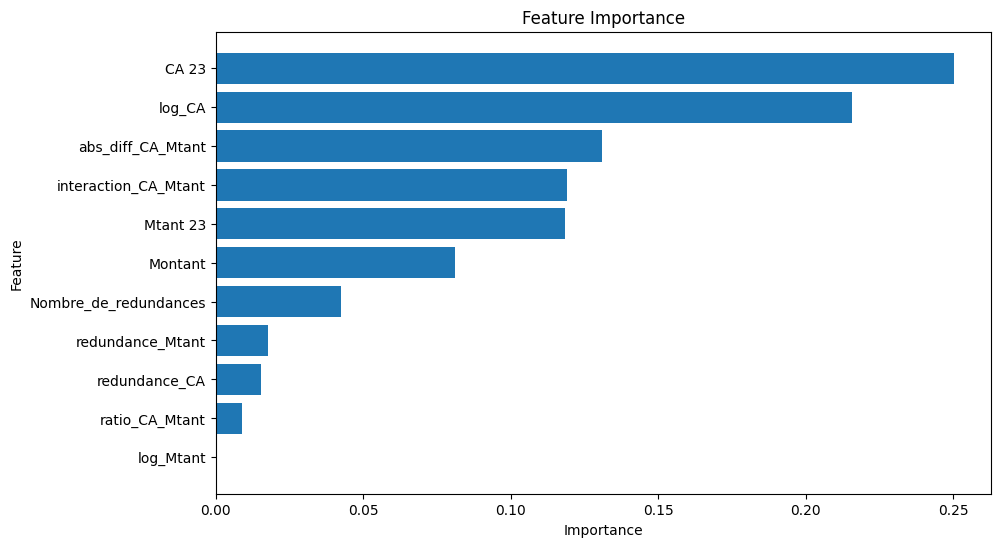

In [345]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier




# Feature Engineering (selon les nouvelles caractéristiques mentionnées)
df['ratio_CA_Mtant'] = df['CA 23'] / (df['Mtant 23'] + 1e-9)
df['abs_diff_CA_Mtant'] = abs(df['CA 23'] - df['Mtant 23'])
df['log_CA'] = np.log1p(df['CA 23'])
df['log_Mtant'] = np.log1p(df['Mtant 23'])
df['interaction_CA_Mtant'] = df['CA 23'] * df['Mtant 23']
df['redundance_CA'] = df['Nombre_de_redundances'] * df['CA 23']
df['redundance_Mtant'] = df['Nombre_de_redundances'] * df['Mtant 23']

# Sélection des caractéristiques et de la cible
features = ['Nombre_de_redundances', 'Montant', 'CA 23', 'Mtant 23', 
            'ratio_CA_Mtant', 'abs_diff_CA_Mtant', 'log_CA', 'log_Mtant', 
            'interaction_CA_Mtant', 'redundance_CA', 'redundance_Mtant']
X = df[features]
y = df['Cluster_label']

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mettre à l'échelle les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Appliquer la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')

# Afficher les résultats de la validation croisée
print("Scores de Validation Croisée : ", cv_scores)
print("Précision Moyenne : ", np.mean(cv_scores))

# Entraîner le modèle sur l'ensemble d'entraînement complet
rf_model.fit(X_train_scaled, y_train)

# Prédire et évaluer sur l'ensemble de test
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print(report)

# Importance des caractéristiques
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()